# Lab 2: Frequency Domain Identification Techniques


In [18]:
clear all
close all
clc
imatlab_export_fig('print-png')

## Beam Properties


In [19]:
l=21.75*0.0254;% length in meters
h=0.5*0.0254;% height in meters
w=1*0.0254;% width in meters
A=w*h;
rho=2700;% density in kg/cubicmeter
E=7.31e10;% youngs modulus in Pa
I = (1/12)*w*h^3; % moment of inertia (m^4)
k = (3*E*I)/l^3; % stiffness (N/m)
V = l*w*h;% volume (m^3)
m = rho*V;% mass (kg)
wn = (sqrt(k/m))/(2*pi) % analytical natural frequency of massless beam with concentrated mass in Hz
wnunibeam=((1.875)^(2)*sqrt((E*I)/(m*(l)^3)))/(2*pi) % natural freqency of a uniform section beam in Hz
%c_cr = 2*sqrt(k*m); % critical damping coefficient


wn =

   17.2300


wnunibeam =

   34.9725



## Freq versus Magnitude plot


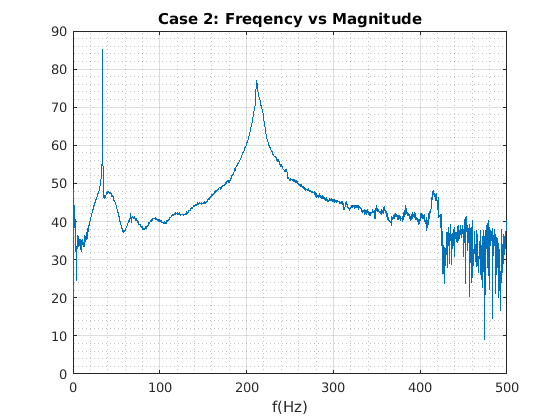

In [39]:

load('Case2-2.mat')
H=20*log10(abs(Hf_chan_2));% in dB
f=Freq_domain; % in Hz
figure
plot(f, H)
grid on
grid minor
title('Case 2: Freqency vs Magnitude')
xlabel('f(Hz)')
%imatlab_export_fig('print-png')

## Quadrature peak picking


In [40]:
hpeak=85.23;% obtained from plot
fd=34.06 %obtained from plot
thredb=(hpeak)/sqrt(2);
fda=33.65;%obtained from plot
fdb=34.35;%obtained from plot
zeta=(fdb-fda)/(2*fd)
fn=fd/sqrt(1-zeta^2) % in hertz


fd =

   34.0600


zeta =

    0.0103


fn =

   34.0618



## Using Vibration Toolbox


> In vtb7_4 (line 132)
> In vtb7_4 (line 162)
DOF 1 of 1. Press return to plot next curve-fit FRF or end.

z =

  single

  5.5664e-04


nf =

  single

   34.0605



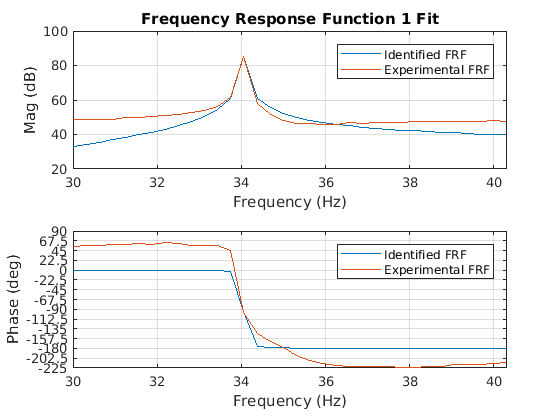

In [43]:
load('Case2-2')
Fmin=30;
Fmax=40;

[z,nf]=vtb7_4(Freq_domain,Hf_chan_2,Fmin,Fmax)


## Closed form solution


In [23]:
Beta1= 1.87510407/l
Beta2= 4.69409133/l

w1=Beta1^2*sqrt((E*I)/(rho*A))
f1=((Beta1^2)/(2*pi))*sqrt((E*I)/(rho*A))
w2=Beta2^2*sqrt((E*I)/(rho*A))
f2=((Beta2^2)/(2*pi))*sqrt((E*I)/(rho*A))


Beta1 =

    3.3942


Beta2 =

    8.4969


w1 =

  219.7631


f1 =

   34.9764


w2 =

   1.3772e+03


f2 =

  219.1932



## Beam Deflection at center due to an excitation on the tip with specified frequency (using vibration toolbox)


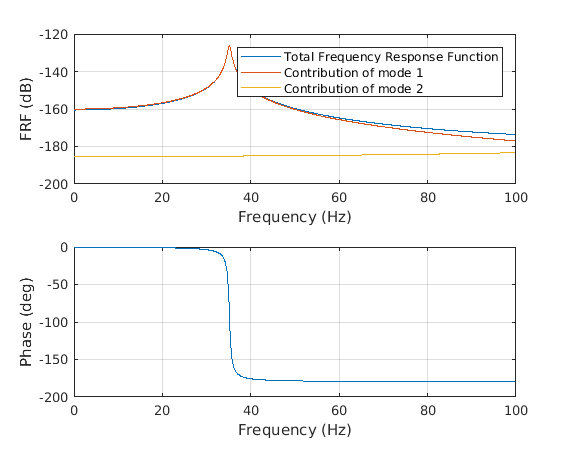

In [24]:
xin=l; %excitation location
xout=l/2; % interested Deflection 
freq=100; % in Hz
F=100; % in Newtons
fmin=0;
fmax=100;% 
bctype=2;% for cantilever beam
beamparams=[E I rho A l];
[fout,H]=vtb6_5(xin,xout,fmin,fmax,beamparams,bctype);

In [25]:
find(fout==100);
admittance=abs(H(2001));
displacement=admittance*F % in meters


displacement =

   2.0861e-07

